## 1) Introduction

### Problem Statement
* There are a large number of factors that can affect the value of a house property (eg. location, size, condition, time), these factors can change quite substantially from one property to another.
* The housing market itself is quite a volatile industry, and is quite dependent on demand and supply fluctuations, not to even mention economic factors sch as interest rates & inflation, so its quite a challenge to predict the price variation over time.
* It's also quite challenging to predict housing prices due to the limited data that is available, most datasets contain a limited number of features related to each property, such is why feature engineering is quite important.
* As a result, it is generally quite difficult to accurately predict property prices that take into account all the factors that influence it.
* The California housing dataset contains different house related attributes for properties located in California.

### Study Aim
* The aim of the model is to predict the median_house_value which is our target variable.
* Overcome missing data with a basic unsupervised learning data imputation.
* Identification of outliers in a dataset.
* Understand how to turn a simple model into your own sklearn comparible class, our aim won't be to create the most perfect model.

### Notebook Covers
* Introduction to basic ML principles such as missing data, scaling, feature engineering, outliers.
* A basic introduction to sklearn compatible classes,model exploration & model modification in an attempt to improve our model.

### MODEL SELECTION
* We'll use an existing model; Bayesian Linear Regression in class structure that can be used with sklearn's Pipeline and cross validation options, so we can use it here.
* after that attempt we can use multiple machine learning models for performance comparison.

## 2) Data Preparation

In [34]:
# Import Libraries
import os,sys,warnings
if not sys.warnoptions:    
    warnings.simplefilter('ignore')
    
import numpy as np
from numpy.linalg import pinv,inv
import pandas as pd
# !pip install geopandas
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns;sns.set(style='whitegrid')
%matplotlib inline
# !pip install geoplot
import geoplot as gplt
import geoplot.crs as gcrs
import mapclassify as mc

from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.base import BaseEstimator, RegressorMixin,ClassifierMixin
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
# !pip install mllibs
# from pyspark.bl_regressor import BR
pi = 4.0*np.arctan(1.0)

color1 = 'darkviolet'
color2 = 'indigo'

### 2.1 Loading the dataset
* We are using California housing Dataset.
* df.info(),describe(),head() are probably one of the first things we might want to inspect having a pandas dataframe; showing feature names, limits/stats and and a few first columns respectively, to get a some initial impression of the data.

In [35]:
df = pd.read_csv(r'D:\Data\Chetan\housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [37]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


* .info() is perhaps a good starting point, having read & loaded data into a pandas dataframe.
* RangeIndex tells us the maximum loaded data instane, thus we can quickly identify columns w/ missing data.
* pandas can read a wide range of data types; so Dtype information is very handy to know.
* .head() is a nice way to peak at our dataset, .tail also is a quick way to scroll to the bottom of the dataset.

In [38]:
# Let's show all columns with missing data as well:
df[df.isnull().any(axis=1)] # any missing data in columns

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


### 2.2 Data Imputation
* We can note that we have a number of features with some missing data, but not too many instances overall (257 / 20640).
* Lets try an Unsupervised Learning (UL) approach based on the kNN model, we can use the function below and pass a dataframe to generated an imputed dataframe.

#### kNN Unsupervised Learning Imputation¶
* Function to impuse missing data using an unsupervised model.
* Here we are replacing the missing values with mean of nearest 5 values using K-Nearest Neighbour technique.|

In [39]:
from sklearn.neighbors import KNeighborsRegressor

# function that imputes a dataframe 
def impute_knn(df):
    
    ''' inputs: pandas df containing feature matrix '''
    ''' outputs: dataframe with NaN imputed '''
    # imputation with KNN unsupervised method

    # separate dataframe into numerical/categorical
    ldf = df.select_dtypes(include=[np.number])           # select numerical columns in df
    ldf_putaside = df.select_dtypes(exclude=[np.number])  # select categorical columns in df
    # define columns w/ and w/o missing data
    cols_nan = ldf.columns[ldf.isna().any()].tolist()         # columns w/ nan 
    cols_no_nan = ldf.columns.difference(cols_nan).values     # columns w/o nan 

    for col in cols_nan:                
        imp_test = ldf[ldf[col].isna()]   # indicies which have missing data will become our test set
        imp_train = ldf.dropna()          # all indicies which which have no missing data 
        model = KNeighborsRegressor(n_neighbors=5)  # KNR Unsupervised Approach
        knr = model.fit(imp_train[cols_no_nan], imp_train[col])
        ldf.loc[df[col].isna(), col] = knr.predict(imp_test[cols_no_nan])
    
    return pd.concat([ldf,ldf_putaside],axis=1)

In [40]:
# Call function that imputes missing data
df2 = impute_knn(df)
# looks like we have a full feature matrix
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### 2.3 Identification & treatment of Outliers

<Axes: >

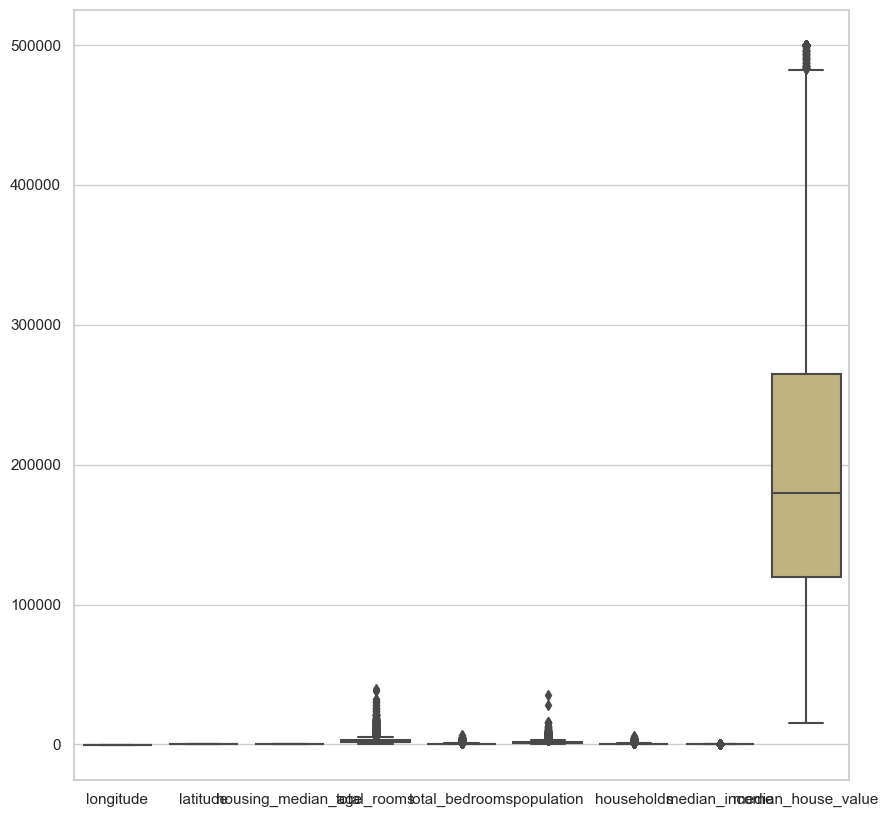

In [41]:
fig, axarr  = plt.subplots(figsize=(10,10))
sns.boxplot(data=df2)

In [42]:
def eliminate_outliers(table):
    a=table.select_dtypes(include=[np.number]).columns.tolist()
    for i in a:
        q1 = table[i].quantile(0.25)
        q3 = table[i].quantile(0.75)
        
        iqr = q3-q1 #Interquartile range

        upper_limit = q3+1.5*iqr 
        lower_limit = q1-1.5*iqr
    
        #print("Upper limit = ",upper_limit)
        #print("Lower limit = ",lower_limit)

        table[i]=np.where(table[i] > upper_limit,upper_limit,table[i]) # upper limit
        table[i]=np.where(table[i] < lower_limit,lower_limit,table[i]) # lower limit
    

<Axes: >

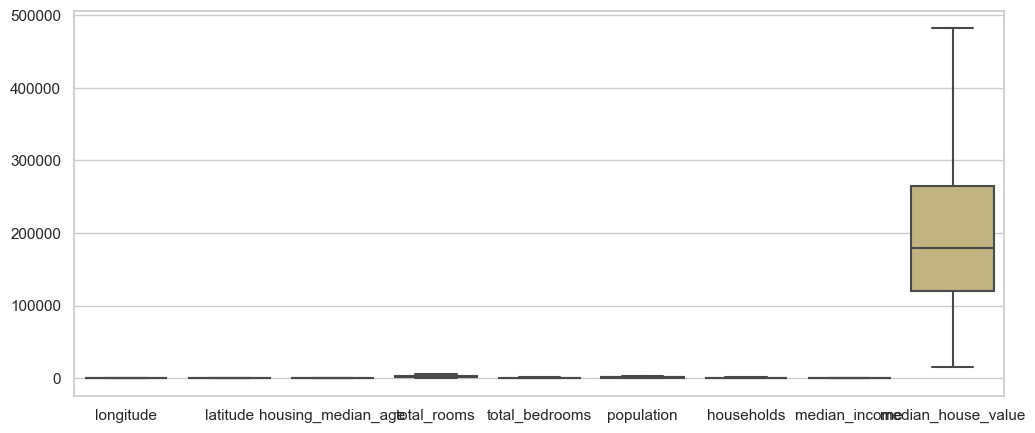

In [43]:
eliminate_outliers(df2)

fig, axarr  = plt.subplots(figsize=(12,5))
sns.boxplot(data=df2)

#### Outlier @ housing_median_age == 52
* We inspected the dataset histogram, and noted a rather odd cluster at a value of 52, 1D data doesn't quite tell the entire story, certainly our histogram data transitions quite steadily, but perhaps during this year it was very affordable. 2D pairplots tend to show this data as being somewhat more like a constraint more than anything, looking very odd compared to the rest of the data (lines in data). Overall, it's not entirely conclusive.

#### Outlier @ median_house_value == 500,001
* Unlike housing_median_age, it is very doubtful that the outlier spike is not a categorically defined summation of all cases above the maximum median_house_value, let's remove this subset, and keep the other.

#### Less noticable outliers
* Having just plotted population in a multivariate plot, we would have noted how the scale created values that are barely visible to the eye, in fact, a model with poorly allocated weights to these outliers can sevely degrade in accuracy, one counter to these outliers is a weight function approach, such as Inverse Distance Weighting (IDW) in models such as Weighted Least Sqaures (WLS) or Covariance Functions in Gaussian Process Models, BR() unfortunately doesn't have this functionality, so we'll have to attempt a common approach known as skewness correction via feature transformation. I thought we'd give it a go and attempt to implement these functions into the BR() model as well, why not.

* Here we have eliminated the outliers using IQR method.

### 2.3 Converting Qualitative data into Numerical ones.
* The qualitative data is generally present in the string format.
* as the model cant accept strings, we have to convert those qualitative columns into numerical ones using Lable Incoder or one hot incoder & other techniques.
* lets seperate numerical data & qualitative data first.

In [44]:
df2_num = df2[df2.select_dtypes(include=[np.number]).columns.tolist()]
df2_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.000,129.0,322.0,126.0,8.013025,452600.0
1,-122.22,37.86,21.0,5698.375,1106.0,2401.0,1092.5,8.013025,358500.0
2,-122.24,37.85,52.0,1467.000,190.0,496.0,177.0,7.257400,352100.0
3,-122.25,37.85,52.0,1274.000,235.0,558.0,219.0,5.643100,341300.0
4,-122.25,37.85,52.0,1627.000,280.0,565.0,259.0,3.846200,342200.0


In [45]:
df2_category = df2[df2.select_dtypes(include=["object"]).columns.tolist()]
df2_category.head()

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY


####  Converting Quality Variable to Number

In [46]:
from sklearn.preprocessing import LabelEncoder
df2_category=df2_category.apply(LabelEncoder().fit_transform)
df2_category.head(3)
# label in ascending order

,ocean_proximity
0,3
1,3
2,3


In [47]:
df2 = pd.concat([df2_num,df2_category],axis=1)
df2.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.000,129.0,322.0,126.0,8.013025,452600.0,3
1,-122.22,37.86,21.0,5698.375,1106.0,2401.0,1092.5,8.013025,358500.0,3
2,-122.24,37.85,52.0,1467.000,190.0,496.0,177.0,7.257400,352100.0,3
3,-122.25,37.85,52.0,1274.000,235.0,558.0,219.0,5.643100,341300.0,3
4,-122.25,37.85,52.0,1627.000,280.0,565.0,259.0,3.846200,342200.0,3


### 2.4 Creating a Training and Testing sets.
* We want to reserve some data, & use it to see how good the model is at prediction on unseen data, so lets create it using train_test_split.

trdata : Training Data Subset (Let's inspect the data as if we only had this data this)

tedata : Test Data Subset (Use this subset for model evaluation)

In [48]:
# We are going to do 80/20 Split.
trdata,tedata = train_test_split(df2,test_size=0.2,random_state=43)

x=df2.drop('median_house_value', axis = 1)
y=df2[['median_house_value']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x,y,train_size=0.8,random_state=55)

### 3) Exploratory Data Analysis (EDA)
* We want to know a little more about our data, a simple data exploration approach is conducted here.
* We are going to perform EDA to understand hidden patterns & trends in the data.

#### 3.1 Univariate Histogram
Lets look at our data distribution, using univariate analysis (analysis of 1 variable). What we might look for in histograms:
* Data distribution ( certain models prefer less skewed distributions )
* Outliers ( Low Noise Assumption can be detremental to model performance )
* Odd patterns in data ( Data abnormalities also affect model performance )
* Axis Scale ( Feature scale values can affect a models performance )

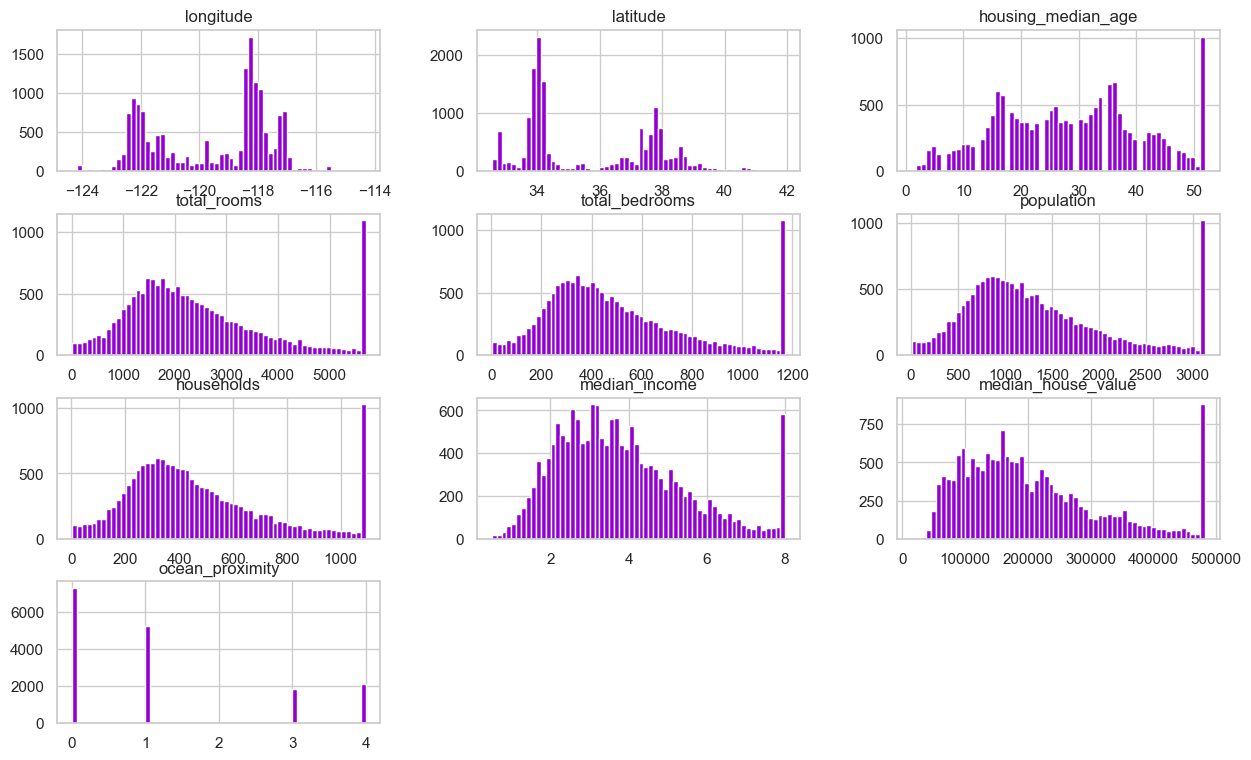

In [49]:
color1 = 'darkviolet'
color2 = 'indigo'

trdata.hist(bins=60, figsize=(15,9),color=color1);plt.show()

#### Odd patterns & Outliers
Data Distribution which stands out
* On first impression, a few outlier (inconsistent with entire set) groups are present in our data; possibly due to the way in which the data was sampled ( 'housing_median_age' & 'median_house_value' ).
* House_median_age is one possible feature with such outliers. Also having a lot of local peaks (all are quite gradual) but one really odd peak at the maximum value stands out. It has some slight discontinuity in data (which becomes visible with the adjustment of bins).
* Feature Median_house_value has an odd peak at its maximum value (around 500k), which could be an outlier.

#### Less noticable outliers
* We have quite a few skewed (less centralised) data distributions, 6 features have such distributions, which is quite a lot and slightly concerning since we are going to use a relatively simple model.
* The range of the x axis for some of these features is quite broad (eg. population), indicating we have quite a few outliers, but unlike the first two, we can apply transformation to features and attempt to correct it.
* Population, total_bedrooms, households and total_rooms represent somewhat connected things, also have similar distribution which is skewed towards smaller values.

#### 3.2 Bivariate Correlation Matrix
* Bivariate (Two Feature) Two-Feature relation ; correlation meature.
* Very fast way to understand something about the dataset.
* Correlation matrix contains only information about the linear similarity of two feature relations.

What we might look for:

* Often emphasised that too highly or too lowly correlated features should be dropped.
* Any signs of nonlinearity in the dataset, such as a fair few low linear correlation values.
* High correlation values between multiple features could indicate that features may represent similar things.

In [50]:
''' Function to plot correlation of features '''
def corrMat(df,id=False):
    
    corr_mat = df.corr().round(2)
    f, ax = plt.subplots(figsize=(6,6))
    mask = np.zeros_like(corr_mat,dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr_mat,mask=mask,vmin=-1,vmax=1,center=0, 
                cmap='plasma',square=False,lw=2,annot=True,cbar=False);plt.show()  

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\SY-DKT-MUM-112\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\SY-DKT-MUM-112\AppData\Local\Temp\ipykernel_15232\2207937363.py", line 1, in <module>
    corrMat(trdata) # plot masked numpy correlation matrix
    ^^^^^^^^^^^^^^^
  File "C:\Users\SY-DKT-MUM-112\AppData\Local\Temp\ipykernel_15232\3929055914.py", line 6, in corrMat
    mask = np.zeros_like(corr_mat,dtype=np.bool)
                                        ^^^^^^^
  File "C:\Users\SY-DKT-MUM-112\anaconda3\Lib\site-packages\numpy\__init__.py", line 305, in __getattr__
    raise AttributeError(__former_attrs__[attr])
AttributeError: module 'numpy' has no attribute 'bool'.
`np.bool` was a deprecated alias for the builtin `bool`. To avoid this error in existing code, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the n

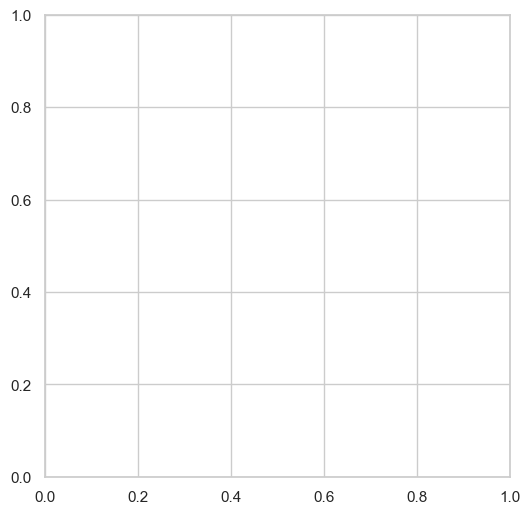

In [51]:
# corrMat(trdata) # plot masked numpy correlation matrix

In [52]:
df2.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [53]:
# df2 = df.drop("ocean_proximity", axis=1)
df2.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
longitude,1.000000,-0.924664,-0.108197,0.029832,0.062047,0.116115,0.054723,-0.015461,-0.046311,-0.289779
latitude,-0.924664,1.000000,0.011173,-0.028146,-0.066299,-0.133225,-0.079117,-0.084654,-0.145494,0.200974
housing_median_age,-0.108197,0.011173,1.000000,-0.381712,-0.330250,-0.307620,-0.307402,-0.142435,0.104423,0.112468
total_rooms,0.029832,-0.028146,-0.381712,1.000000,0.918125,0.828494,0.909489,0.251895,0.173622,-0.009927
total_bedrooms,0.062047,-0.066299,-0.330250,0.918125,1.000000,0.873507,0.977662,-0.011156,0.062930,-0.004794
population,0.116115,-0.133225,-0.307620,0.828494,0.873507,1.000000,0.904272,0.000984,-0.030735,-0.085411
households,0.054723,-0.079117,-0.307402,0.909489,0.977662,0.904272,1.000000,0.017790,0.080980,-0.010561
median_income,-0.015461,-0.084654,-0.142435,0.251895,-0.011156,0.000984,0.017790,1.000000,0.689654,-0.019773
median_house_value,-0.046311,-0.145494,0.104423,0.173622,0.062930,-0.030735,0.080980,0.689654,1.000000,0.081356
ocean_proximity,-0.289779,0.200974,0.112468,-0.009927,-0.004794,-0.085411,-0.010561,-0.019773,0.081356,1.000000


<Axes: >

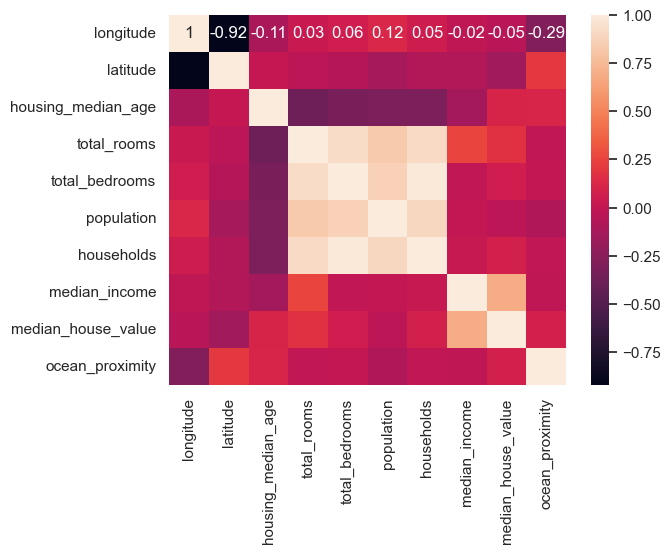

In [54]:
sns.heatmap(np.round(df2.corr(),2),annot = True)

* Target variable median_house_value is very mildly correlated to all but one feature here: median_income, so one might outline this as an important feature.
* A correlation of -0.02 & -0.05 (population/longitude) to the target variable median_house_value might be worth dropping, but they might not be. In fact, a low value isn't exactly a reason to drop a feature. It could simply imply the data is spread quite a lot, which is a strong indicator of nonlinearity.
* It is often advised to drop such features, especially for less complex models, as the model probably won't be able to pick up on one feature with such nonlinearity, let alone multiple.
* It's possible to plot a shifted matrix, which looks a little nicer.

#### 3.3 Bivariate Scattered data
* Pairplots/Scatter Matrices are very insightful & can be used to find interesting scatter platterns in bivariate (two feature data plots) relations.
* Scatter plots allow the addition of color labelling, however its often quite difficult to distinguish between color labels in a scattered matrix.

What we might look for:


* Irregular two feature patterns or outliers ( multiple features give a clearer picture of outlier).
* Two dimensional Data clusters (using KDE approximation).
* Two feature linear correlation value visualisation in two dimensional space ( is the data sorted linearly or completly random)

In [55]:
''' Draw a Bivariate Seaborn Pairgrid /w KDE density w/ '''
def snsPairGrid(df):

    ''' Plots a Seaborn Pairgrid w/ KDE & scatter plot of df features'''
    g = sns.PairGrid(df,diag_sharey=False)
    g.fig.set_size_inches(14,13)
    g.map_diag(sns.kdeplot, lw=2) # draw kde approximation on the diagonal
    g.map_lower(sns.scatterplot,s=15,edgecolor="k",linewidth=1,alpha=0.4) # scattered plot on lower half
    g.map_lower(sns.kdeplot,cmap='plasma',n_levels=10) # kde approximation on lower half
    plt.tight_layout()

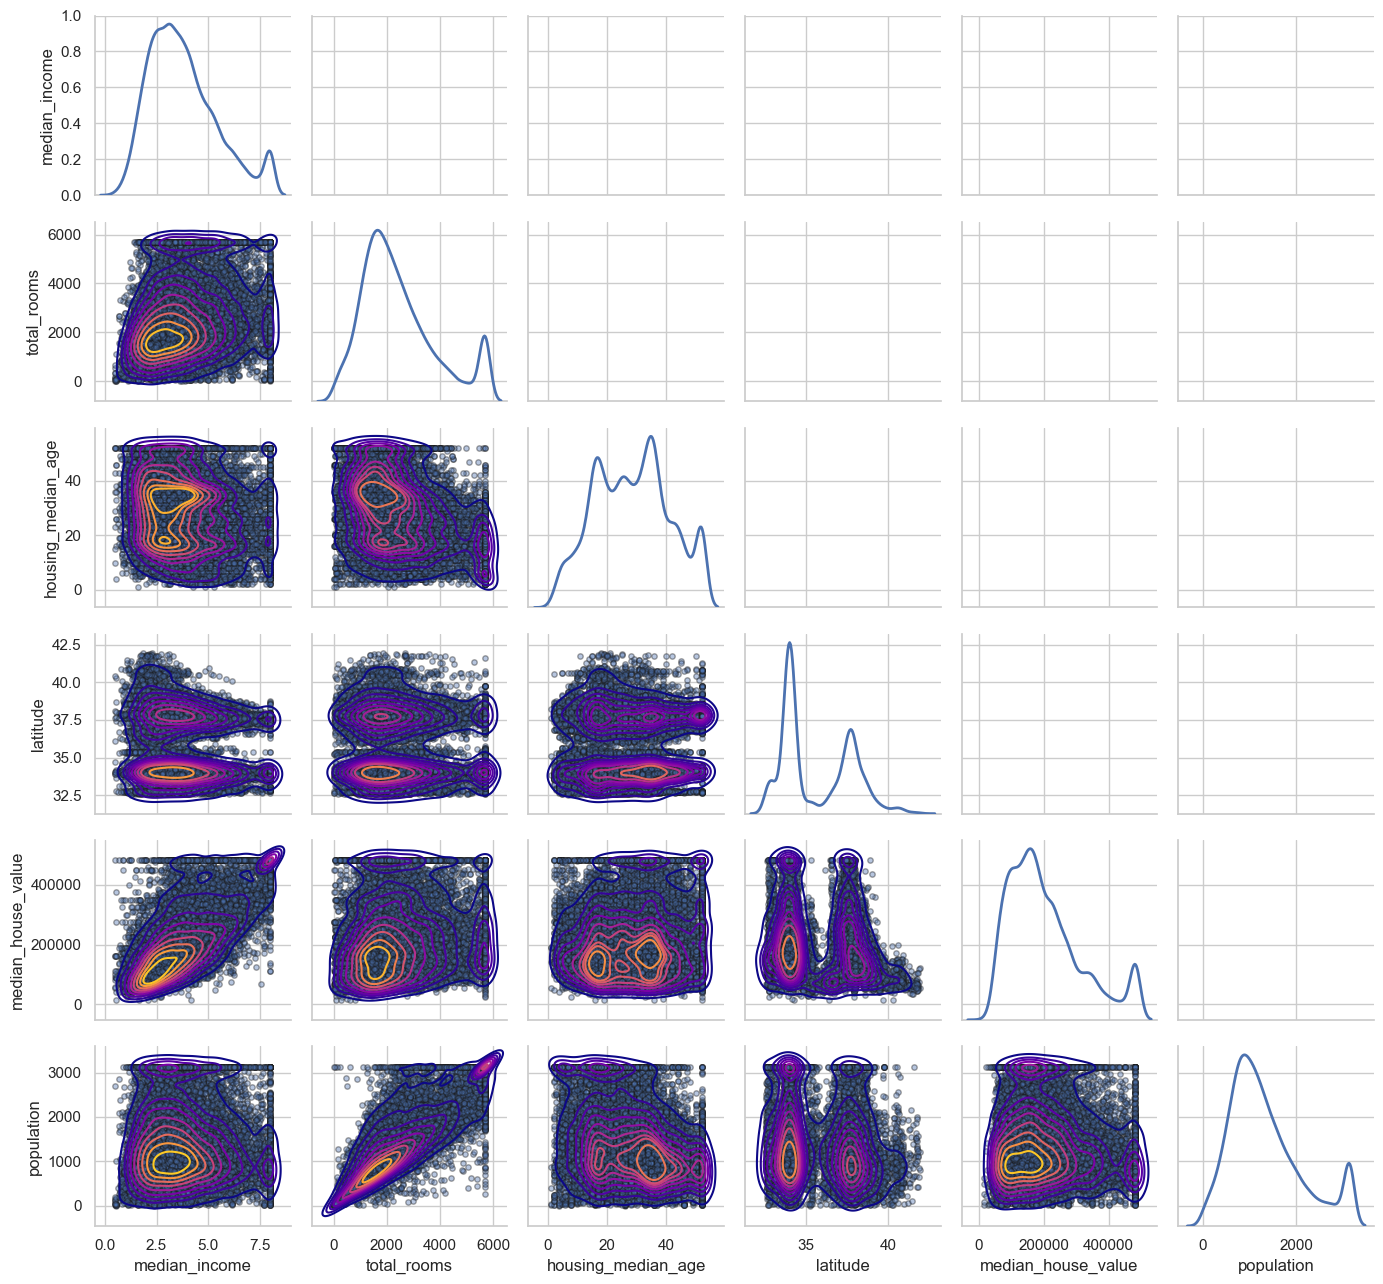

In [56]:
# Seaborn get a little slow, let's plot some interesting features
tlist = ['median_income','total_rooms','housing_median_age','latitude','median_house_value','population']
snsPairGrid(trdata[tlist]) 

#### Relating to "Median_House_Value"
* median_house_value and median_income relation looks quite linear, with a fair bit of deviation normal to the linear line, we can also note a visible upper limit for all values of 'median_income', which in two dimensions, definitely looks out of place.
* In median_house_age vs median_house_value relation, it looks like the data is completely spread out all over the place; KDE helping the identification of two peaks roughtly 20 years appart, perhaps these peaks are associated with increasing affordability (given they are concentrated in the lower half).
* We an note an additional peak near the peak values of both features as well. The relation is very nonlinear, being scattered everywhere, having data in almost all parts of the graph.
* median_house_value & total_rooms,population seem like quite complex features to model, KDE suggests it's heavily concentrated at lower values for the two, with a fair bit at larger values & a lot of data outside the main clusters, classifiable as outliers.
* Many of our features have quite different axis scales, higher values might be interpreted as more important, so scaling should definitely be considered.

#### 3.4 Geospatial Multivariate Data
* Multivariate visualisating can be even more insightful than bivariate. Adding 'hue'/colour to scattered data gives the data an extra dimension we can interpred provided there is minimal overlap
* Geographic plotting is one form of such visualisation. It would be interesting to understand how geography influences various features.
* We're dealing with geographical data, so geopandas is quite useful, so is folium & plotly
* Other modules you might like to add (mainly for 3D) k3d and pyvista are awesome for multivariate visualisation too.

In [57]:

''' Plot Two Geopandas Plots Side by Side '''
# defining a simple plot function, input list containing features of names found in dataframe
def plotTwo(df,lst):
    
    # load california from module, common for all plots
    cali = gpd.read_file(gplt.datasets.get_path('california_congressional_districts'))
    cali = cali.assign(area=cali.geometry.area)
    
    # Create a geopandas geometry feature; input dataframe should contain .longtitude, .latitude
    gdf = gpd.GeoDataFrame(df,geometry=gpd.points_from_xy(df.longitude,df.latitude))
    proj=gcrs.AlbersEqualArea(central_latitude=37.16611, central_longitude=-119.44944) # related to view

    ii=-1
    fig,ax = plt.subplots(1,2,figsize=(21,6),subplot_kw={'projection': proj})
    for i in lst:

        ii+=1
        tgdf = gdf.sort_values(by=i,ascending=True) 
        gplt.polyplot(cali,projection=proj,ax=ax[ii]) # the module already has california 
        gplt.pointplot(tgdf,ax=ax[ii],hue=i,cmap='plasma',legend=True,alpha=1.0,s=3) # 
        ax[ii].set_title(i)

    plt.tight_layout()
    plt.subplots_adjust(wspace=-0.5)


In [58]:
trdata.info()


<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 72 to 14148
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  int32  
dtypes: float64(9), int32(1)
memory usage: 1.3 MB


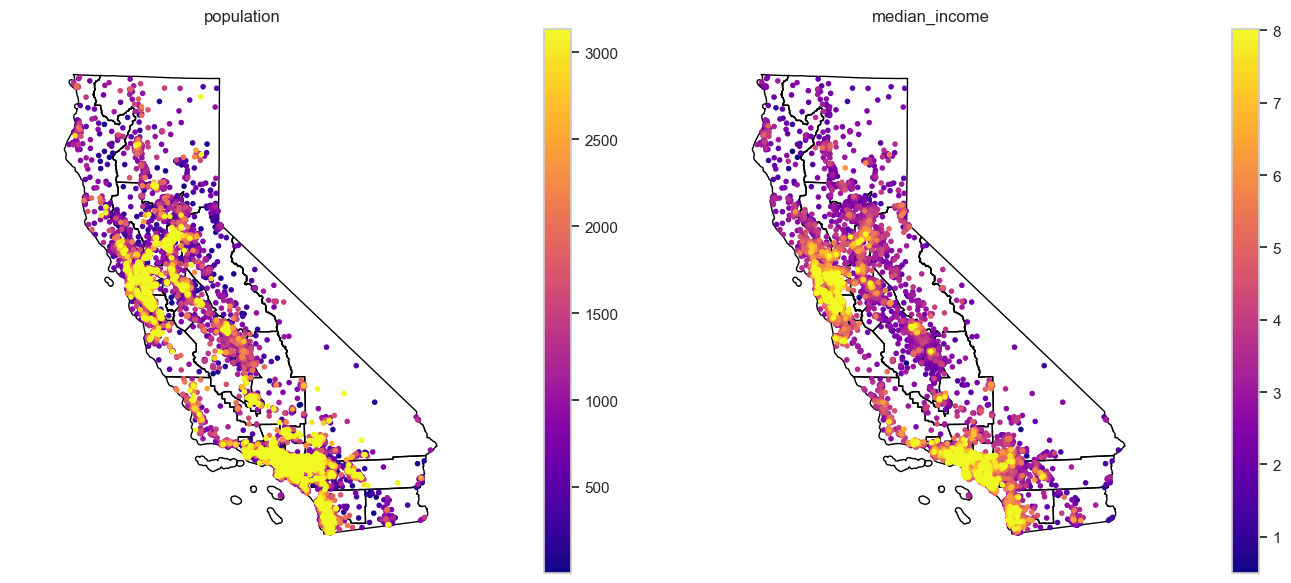

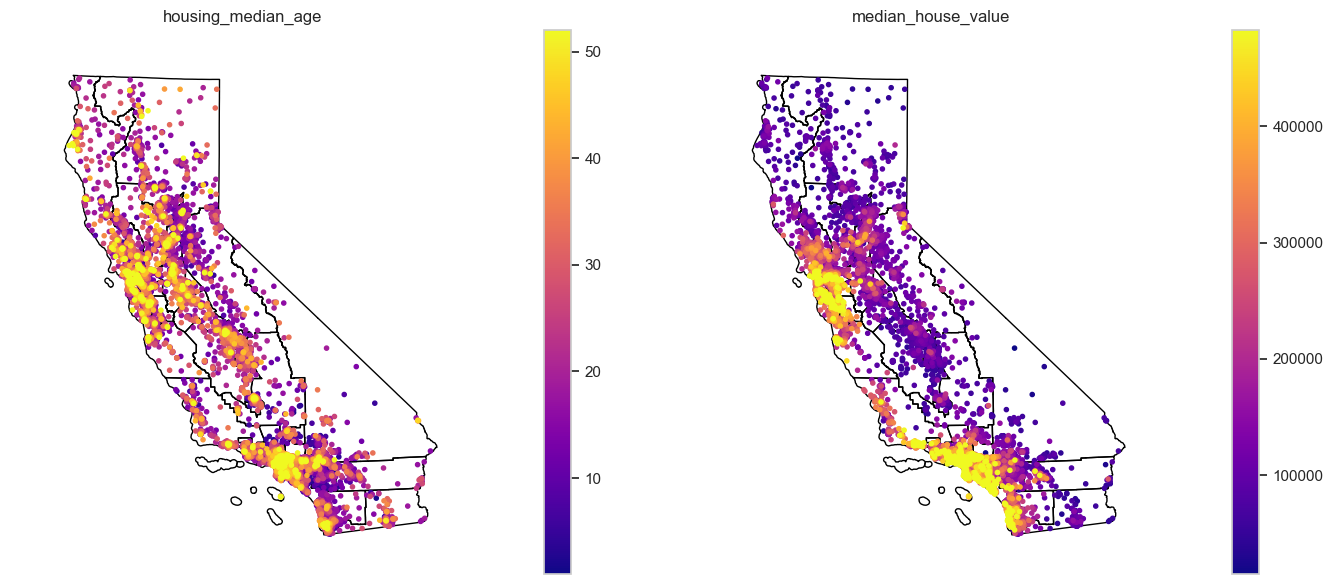

In [59]:
# Call function that plots two geopandas plots 
plotTwo(trdata,['population','median_income'])
plotTwo(trdata,['housing_median_age','median_house_value'])
# del trdata['geometry'] # not useful for anything other than gpd visualisation

* For our target variable, median_house_value, just by looking at these graphs, one could immediately note some patterns; geography(location) and median_house_income show clear relation; generally increasing the closer you get to the two main clusters, so these two features would probably be important.
* Housing_median_age for a lot of regions is also strongly correlated to the target variable, but in many regions it isn't (slightly more inland), so its not so clear cut. The relation is probably just nonlinear. Recalling the pairplot, we saw quite a lot of spread in the data, however one could notice two main clusters from that graph, which showed some some linearity aspect.
* Population is a little more tricky, its somewhat correlated, although we have a few outliers (not even visible on the univariate histogram) which make it harder see a relation as the values are more bunched up in the < 10k group, but there does tend to be a relation though, as indicated by the correlation value.

In [60]:
trdata2 = trdata.drop("ocean_proximity", axis=1)
tedata2 = tedata.drop("ocean_proximity", axis=1)

trdata2.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925418,-0.110523,0.031504,0.064303,0.118931,0.058184,-0.015831,-0.043765
latitude,-0.925418,1.000000,0.013790,-0.029672,-0.069002,-0.135736,-0.082276,-0.083486,-0.147366
housing_median_age,-0.110523,0.013790,1.000000,-0.380891,-0.329696,-0.308402,-0.307903,-0.142994,0.102973
total_rooms,0.031504,-0.029672,-0.380891,1.000000,0.919114,0.828662,0.910382,0.249849,0.173183
total_bedrooms,0.064303,-0.069002,-0.329696,0.919114,1.000000,0.875328,0.978381,-0.010593,0.063765
population,0.118931,-0.135736,-0.308402,0.828662,0.875328,1.000000,0.905042,-0.001345,-0.032296
households,0.058184,-0.082276,-0.307903,0.910382,0.978381,0.905042,1.000000,0.017624,0.080174
median_income,-0.015831,-0.083486,-0.142994,0.249849,-0.010593,-0.001345,0.017624,1.000000,0.688071
median_house_value,-0.043765,-0.147366,0.102973,0.173183,0.063765,-0.032296,0.080174,0.688071,1.000000


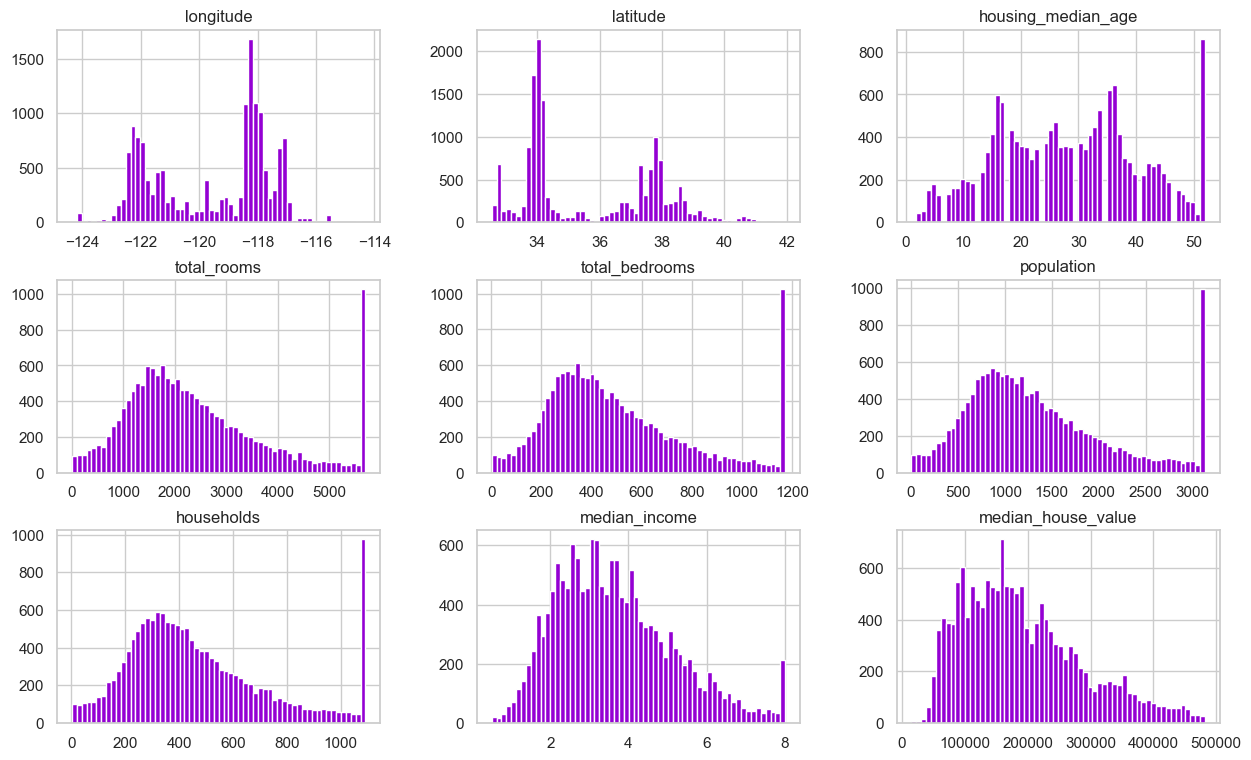

In [61]:
# trdata_upd : training data w/ removed outliers
maxval2 = trdata2['median_house_value'].max() # get the maximum value
trdata_upd = trdata2[trdata2['median_house_value'] != maxval2] 
tedata_upd = tedata2[tedata2['median_house_value'] != maxval2]
trdata_upd.hist(bins=60, figsize=(15,9),color=color1);plt.show() # looks like its completely removed.

### 5) Feature Engineering
* Creation and modification of the feature matrix data,Feature Engineering is quite important and quite a cyclic process, we want to input a feature matrix that will help teach a model something useful.
* We want to make sure we feed the model data that is most relevant to the prediction of a target variable, perhaps as less overlapping as possible as well.
* Features with very high correlation teach a model similar things, multiple times, maybe consider combing them and dropping the others.

#### Somethings we could try
* In this problem, we don't have a lot of features to play around with, but we noted that we have a few which are quite similar. Let's create a relatively simple combination from them, and drop the rest.
* We'll also create a feature which combines both coordinates as the we saw in the multivariate data, there is a relation that changes quite steadily on the diagonal (moving closer to the ocean and inland).

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\SY-DKT-MUM-112\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\SY-DKT-MUM-112\AppData\Local\Temp\ipykernel_15232\3972797958.py", line 4, in <module>
    corrMat(trdata_upd)
  File "C:\Users\SY-DKT-MUM-112\AppData\Local\Temp\ipykernel_15232\3929055914.py", line 6, in corrMat
    mask = np.zeros_like(corr_mat,dtype=np.bool)
                                        ^^^^^^^
  File "C:\Users\SY-DKT-MUM-112\anaconda3\Lib\site-packages\numpy\__init__.py", line 305, in __getattr__
    raise AttributeError(__former_attrs__[attr])
AttributeError: module 'numpy' has no attribute 'bool'.
`np.bool` was a deprecated alias for the builtin `bool`. To avoid this error in existing code, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
The aliases was 

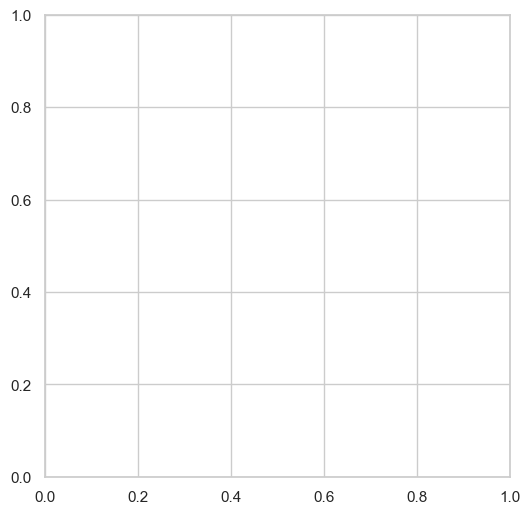

In [62]:
# Make a feature that contains both longtitude & latitude
trdata_upd['diag_coord'] = (trdata_upd['longitude'] + trdata_upd['latitude'])         # 'diagonal coordinate', works for this coord
trdata_upd['bedperroom'] = trdata_upd['total_bedrooms']/trdata_upd['total_rooms']     # feature w/ bedrooms/room ratio
corrMat(trdata_upd)
# update test data as well
tedata_upd['diag_coord'] = (tedata_upd['longitude'] + tedata_upd['latitude'])
tedata_upd['bedperroom'] = tedata_upd['total_bedrooms']/tedata_upd['total_rooms']     # feature w/ bedrooms/room ratio

### 6) DEFINING A CUSTOM CLASS ML MODEL
* We've done some data visualisation, cleaned up outliers, and have a ready set of feature we'll used to train a model.
* All evaluation functions use the simpler automated hyperparameter tuning approach, however I've also included the grid search in case that would be of use.

#### 6.1 Bayesian Linear Regression Model
* We've decided to use the Bayesian Linear Regression model in this problem.

### 7) ML Model to predict Mean House Price

#### 7.1 Random Forest regression models
For the base models, let's investigate three things using a 5-fold Cross Validation Approach:

* Foremost, let's create a simple Random Forest model, DummyRegressor()
* We have two ready dataframes, the original feature dataframe trdata & tradata_upd, with the additional two features. We'll use the automatically tuned hyperparameter (lamda & alpha) for all BR() generated models in the cross validation.
* Additionally we noted that several features (total_rooms,total_bedrooms,population) have very high correlation to one another, so it's interesting to find out if a removal of a few of them would have any affect on the model performance.

In [151]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# by default 100 tree will be form 
model_1 = RandomForestRegressor(n_estimators=100, # make 100 tress
                               criterion='squared_error',
                               max_depth=10,  # each tree will have 10 branches
                               min_samples_split=50,# each tree will have parent node
                               min_samples_leaf=30,# each tree will have Child node
#                                max_features="1")# n_estimators means number tree we want  
                             )
model_1.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=30, min_samples_split=50)

In [152]:
RandomForestRegressor?

In [153]:
train = pd.concat([X_train,y_train],axis=1)
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 7620 to 4762
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  int32  
 9   median_house_value  16512 non-null  float64
dtypes: float64(9), int32(1)
memory usage: 1.3 MB


#### Prediction on train dataset

In [154]:
train['Predicted']= model_1.predict(X_train)
# train.head()

#### Model performance on training dataset

In [155]:
from sklearn import metrics
print(metrics.r2_score(y_train, train.Predicted))

0.7963959237407585


### Random Forest Visualization

In [157]:
# # Import tools needed for visualization
# from sklearn.tree import export_graphviz
# # !pip install pydot
# import pydot

# tree = model.estimators_[1]  # specify the tree number   
# Churn=['Yes','No'] 
# # Export the image to a dot file
# feature_list = list(x.columns)  # all variable name
# export_graphviz(tree, out_file = 'abc.dot', 
#                 feature_names = feature_list, 
#                 leaves_parallel=True,
#                 class_names=Churn,
#                 rounded = True, 
#                 filled=True)
# # Use dot file to create a graph
# (graph,)= pydot.graph_from_dot_file('abc.dot')
# # Write graph to a png file
# graph.write_png('tree.png')
# from IPython.display import Image
# Image(filename = 'tree.png')

In [158]:
test = pd.concat([X_test,y_test],axis=1)
# test.info()

In [159]:
test['Predicted']= model_1.predict(X_test)
# test.head()

In [176]:
Random_Forest_Accuracy = metrics.r2_score(y_test, test['Predicted'])
print(Random_Forest_Accuracy)

0.811215877532959


### Importance of Features

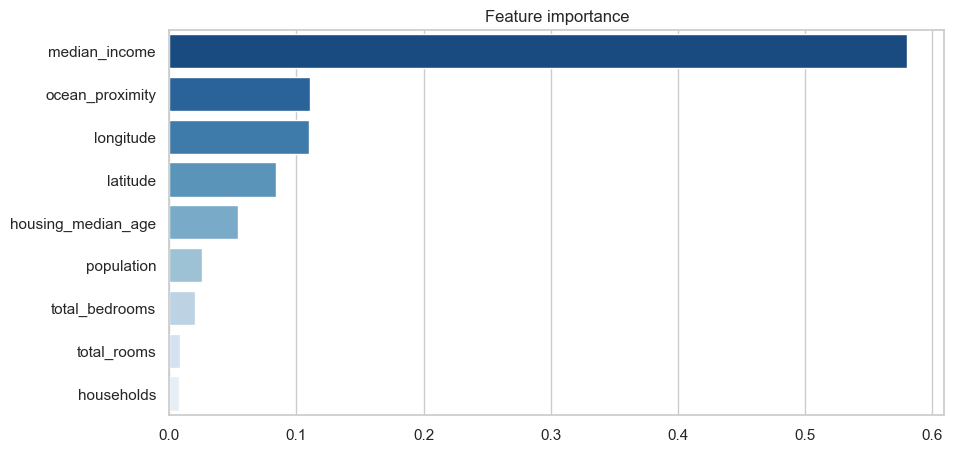

In [177]:
# Plot features importances
imp = pd.Series(data=model.feature_importances_, index=x.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_r", orient='h')

### 8) Gradient boosting regression model

In [178]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor  

# Re-fit the model with the best parameters
model_2 = GradientBoostingRegressor(random_state=10,loss="squared_error",criterion="friedman_mse",
                                 n_estimators=100,
                                 learning_rate=0.1,
                                 min_samples_split=50,
                                 min_samples_leaf=50,
                                 max_depth=5)
model_2.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=5, min_samples_leaf=50,
                          min_samples_split=50, random_state=10)

In [179]:
train = pd.concat([X_train,y_train],axis=1)
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 7620 to 4762
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  int32  
 9   median_house_value  16512 non-null  float64
dtypes: float64(9), int32(1)
memory usage: 1.3 MB


In [180]:
train['Predicted']= model_2.predict(X_train)
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,Predicted
7620,-118.25,33.84,19.0,1731.0,420.0,1032.0,364.0,3.8125,0,208100.0,200025.616608
7073,-118.02,33.95,35.0,2085.0,400.0,1112.0,391.0,3.4886,0,173900.0,186512.958967
1803,-122.35,37.91,4.0,2851.0,798.0,1285.0,712.0,4.2895,3,186800.0,252200.820905
9062,-118.15,34.69,32.0,1300.0,234.0,712.0,249.0,3.2500,1,107500.0,106509.336130
11396,-117.97,33.73,19.0,4154.0,560.0,2130.0,589.0,7.2845,0,301800.0,327385.929332


In [181]:
from sklearn import metrics
print(metrics.r2_score(y_train, train.Predicted))

0.8451415276833798


In [182]:
test = pd.concat([X_test,y_test],axis=1)
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4128 entries, 6380 to 18733
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           4128 non-null   float64
 1   latitude            4128 non-null   float64
 2   housing_median_age  4128 non-null   float64
 3   total_rooms         4128 non-null   float64
 4   total_bedrooms      4128 non-null   float64
 5   population          4128 non-null   float64
 6   households          4128 non-null   float64
 7   median_income       4128 non-null   float64
 8   ocean_proximity     4128 non-null   int32  
 9   median_house_value  4128 non-null   float64
dtypes: float64(9), int32(1)
memory usage: 338.6 KB


In [183]:
test['Predicted']= model_2.predict(X_test)
test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,Predicted
6380,-118.04,34.17,52.0,1885.0,401.0,764.0,373.0,4.038500,1,265700.0,280427.297171
5256,-118.48,34.07,37.0,4042.0,549.0,1318.0,542.0,8.013025,0,482412.5,501201.011590
2204,-119.85,36.82,15.0,1387.0,236.0,638.0,195.0,5.584200,1,88900.0,149160.849794
18982,-122.01,38.26,12.0,4132.0,710.0,2087.0,633.0,4.598700,1,139700.0,159711.105469
14147,-117.08,32.74,35.0,1434.0,253.0,753.0,228.0,2.381200,4,135100.0,110865.286044


In [184]:
Gradient_Boosting_Accuracy = metrics.r2_score(y_test, test['Predicted'])
print(Gradient_Boosting_Accuracy)

0.8013511772150188


### 9) EXtreme Boosting Regression mode

In [185]:
# !pip install xgboost

In [186]:

from xgboost import XGBRegressor  

# Re-fit the model with the best parameters
model_3 = XGBRegressor(random_state=10,loss="squared_error",criterion="friedman_mse",
                                 n_estimators=60,
                                 learning_rate=0.1,
                                 min_samples_split=50,
                                 min_samples_leaf=50,
                                 max_depth=8)
model_3.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, criterion='friedman_mse', device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, loss='squared_error', max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, min_samples_leaf=50, min_samples_split=50,
             missing=nan, monotone_constraints=None, multi_strategy=None, ...)

In [187]:
train = pd.concat([X_train,y_train],axis=1)
# train.info()
train['Predicted']= model_3.predict(X_train)
# train.head()

In [188]:
from sklearn import metrics
print(metrics.r2_score(y_train, train.Predicted))

0.9204132556915283


In [189]:
test = pd.concat([X_test,y_test],axis=1)
# test.info()
test['Predicted']= model_3.predict(X_test)
# test.head()

In [190]:
Extreme_Boosting_Accuracy = metrics.r2_score(y_test, test['Predicted'])
print(Extreme_Boosting_Accuracy)

0.811215877532959


In [191]:
print("Accuracy of all the three models is: ")
print("Random Forest: ",Random_Forest_Accuracy)
print("Gradient Boosting: ",Gradient_Boosting_Accuracy)
print("Extreme Boosting: ",Extreme_Boosting_Accuracy)

Accuracy of all the three models is: 
Random Forest:  0.811215877532959
Gradient Boosting:  0.8013511772150188
Extreme Boosting:  0.811215877532959


### 8) Saving all the ML models in the form of Pickle files

In [192]:
import pickle

pickle.dump(model_1, open('RF_Model.pkl','wb'))
RF_model=pickle.load(open('RF_Model.pkl','rb'))

pickle.dump(model_2, open('GB_Model.pkl','wb'))
GB_model=pickle.load(open('GB_Model.pkl','rb'))

pickle.dump(model_3, open('XGB_Model.pkl','wb'))
XGB_model=pickle.load(open('XGB_Model.pkl','rb'))